# A comprehensive data exploration of taxi-trip data of Newyork

### Project description: 

This project uses a dataset called `2017_Yellow_Taxi_Trip_Data.csv`, it was gathered by the **New York City Taxi & Limousine Commission** and published by the city of **New York** as part of their NYC Open Data program. In order to improve the learning experience and shorten runtimes, a sample was drawn from the 113 million rows in the 2017 Yellow Taxi Trip Data table.

### Dataset description: 

The column head of the given dataset is read as follows:

| ID | VendorID | tpep_pickup_datetime | tpep_dropoff_datetime | Passenger_count | Trip_distance | PULocationID | 
|----|----------|----------------------|-----------------------|-----------------|---------------|--------------|
|    |          |                      |                       |                 |               |              |


| RateCodeID  | Store_and_fwd_flag  | Payment_type  | Fare_amount  | Extra  | MTA_tax  | Improvement_surcharge  | 
|-------------|---------------------|---------------|--------------|--------|----------|------------------------|
|             |                     |               |              |        |          |                        |

| Tip_amount   | Tolls_amount   | Total_amount | 
|--------------|----------------|--------------|
|              |                |              |


where,

`ID` - Trip identification number 
  
`VendorID` - A code indicating the TPEP provider that provided the record **(1= Creative Mobile Technologies, LLC; 2= VeriFone Inc).**
  
`tpep_pickup_datetime` - The date and time when the meter was engaged.  
  
`tpep_dropoff_datetime` - The date and time when the meter was disengaged. 
  
`Passenger_count` - The number of passengers in the vehicle (This is driver entered value).  
  
`Trip_distance` - The elapsed trip distance in miles reported by the taximeter.
  
`PULocationID` - TLC Taxi Zone in which the taximeter was engaged.
  
`RateCodeID` - The final rate code in effect at the end of the trip.  
  
`Store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server. 
  
`Payment_type ` - A numeric code signifying how the passenger paid for the trip (**1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip).**  
  
`Fare_amount` - The time-and-distance fare calculated by the meter.  
    
`Extra` - Miscellaneous extras and surcharges. Currently, this only includes the USD 0.50 and USD 1 rush hour and overnight charges.  
   
`MTA_tax` - USD 0.50 MTA tax that is automatically triggered based on the metered rate in use.  
   
`Improvement_surcharge` - USD 0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.  
  
`Tip_amount ` - This field is automatically populated for credit card tips. Cash tips are not included.  
  
`Tolls_amount` - Total amount of all tolls paid in trip.  
  
`Total_amount` - The total amount charged to passengers. Does not include cash tips.  
  
  
 


## Section 1: General Overview 

This section addresses the following questions: 

1. What is the size of the dataset?  
  
2. Are there any missing values in the dataset?  
  
3. What are the data types of each column?  
  
  


In [2]:
#Import necessary Python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Import the dataset and obtain a general view of its columns

dataset = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
dataset.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [3]:
# What is the size of the dataset?

num_rows = dataset.shape[0]
num_col = dataset.shape[1]

print(f"Number of rows and column of the data set is {num_rows} and {num_col}")


Number of rows and column of the data set is 22699 and 18


In [4]:
# Are there any missing values in the dataset?

missing_values = dataset.isnull().any()
print("Are there any missing values in the dataset?")
print(missing_values)

Are there any missing values in the dataset?
Unnamed: 0               False
VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
dtype: bool


In [5]:
# What are the data types of each column?

dataset.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

`tpep_pickup_datetime` and `tpep_dropoff_datetime` columns are not in the datetime format, it is advisable to convert them to datetime format. 

In [6]:
dataset['tpep_pickup_datetime'] = pd.to_datetime(dataset['tpep_pickup_datetime'])
dataset['tpep_dropoff_datetime'] = pd.to_datetime(dataset['tpep_dropoff_datetime'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

## Section 2: Temporal Analysis 

This section addresses the following questions: 

1. How does the number of trips vary over time?  
  
  
2. Are there any patterns or trends in the pickup and dropoff times?  
  
  3. How do pickup and dropoff patterns vary across different days of the week?


In [7]:
# First find the minimum and maximum datetime in the tpep_pickup_datetime column
min_pickup_datetime = dataset['tpep_pickup_datetime'].min()
max_pickup_datetime = dataset['tpep_pickup_datetime'].max()

print(f"The minimum and maximum time period in the dateset are {min_pickup_datetime} and {max_pickup_datetime}")


The minimum and maximum time period in the dateset are 2017-01-01 00:08:25 and 2017-12-31 23:45:30


In [8]:
# Extrate date from tpep_pickup_datetime column 

dataset['pickup_date'] = pd.to_datetime(dataset['tpep_pickup_datetime']).dt.date

# Group by pickup date and count passenger_count

grouped_subset_of_dataset = dataset.groupby(dataset['pickup_date'])['passenger_count'].count().reset_index() 
grouped_subset_of_dataset.columns = ['pickup_date', 'total_trips']
grouped_subset_of_dataset.head(5)

,pickup_date,total_trips
0,2017-01-01,60
1,2017-01-02,62
2,2017-01-03,65
3,2017-01-04,54
4,2017-01-05,67


Text(0.5, 1.0, 'Total trips over time')

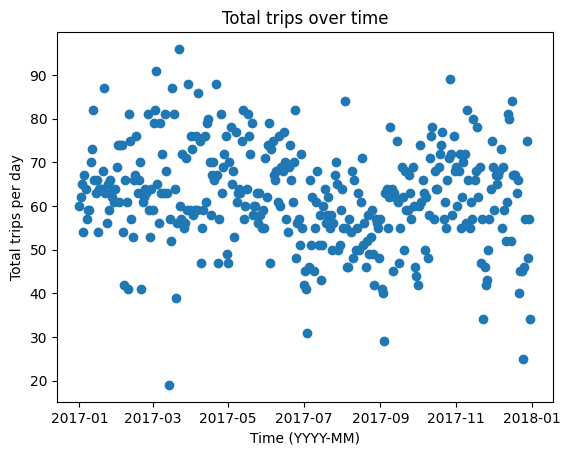

In [9]:
#Plot the total trips per day in the dataset in the given time-frame

plt.scatter(grouped_subset_of_dataset['pickup_date'], grouped_subset_of_dataset['total_trips'])
plt.xlabel('Time (YYYY-MM)')
plt.ylabel('Total trips per day')
plt.title('Total trips over time')

In [10]:
# Extract hour of pickup and dropoff

dataset['pickup_hour'] = pd.to_datetime(dataset['tpep_pickup_datetime']).dt.hour
dataset['dropoff_hour'] = pd.to_datetime(dataset['tpep_dropoff_datetime']).dt.hour



Text(0.5, 1.0, 'Distribution of Drop-off Hours')

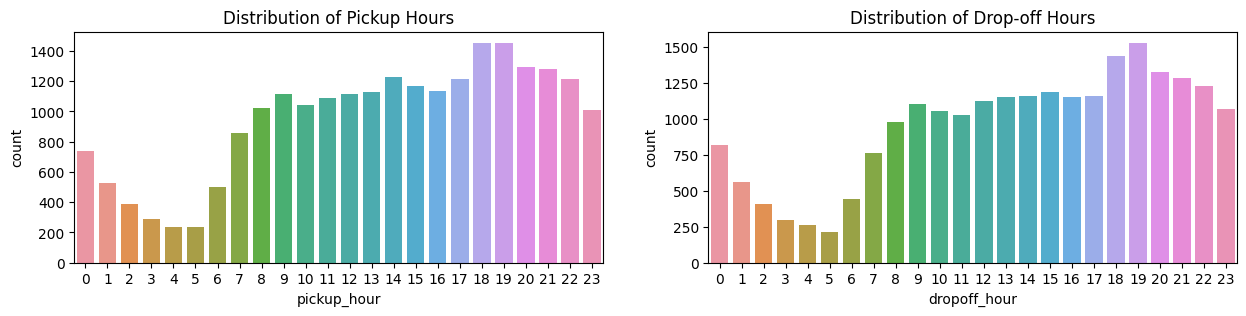

In [11]:
#Plot the distribution of pickup and dropoff hour 

plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
sns.countplot(x='pickup_hour', data=dataset)
plt.title('Distribution of Pickup Hours')
#plt.xticks(rotation = 45, ha = 'center')

plt.subplot(1,2,2)
sns.countplot(x='dropoff_hour', data=dataset)
plt.title('Distribution of Drop-off Hours')
#plt.xticks(rotation = 45, ha = 'center')

The distribution of pickup and dropoff times reveals peak hours during which taxi trips are most frequent. This could indicate rush hours or periods of high demand.

In [12]:
#Create a day column 

dataset['pick_up_day'] = pd.to_datetime(dataset['tpep_pickup_datetime']).dt.day_name()

In [13]:
Day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Rides_in_days = dataset['pick_up_day'].value_counts()

Rides_in_days = Rides_in_days.reindex(index = Day_order)

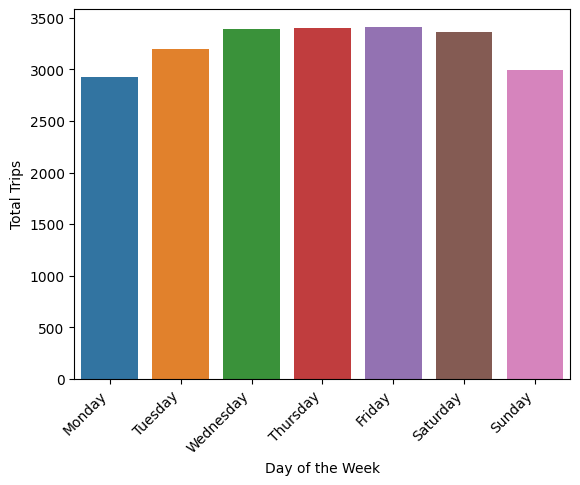

In [14]:
#Plot the distribution of total rides in each day of the week

sns.barplot(x=Rides_in_days.index, y=Rides_in_days)
plt.xlabel('Day of the Week')
plt.ylabel('Total Trips')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [15]:
dataset['pick_up_day'].value_counts()

Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: pick_up_day, dtype: int64

## Section 3: Passenger & Distance Analysis

This section addresses the following questions: 

1. What is the distribution of the number of passengers per trip?  
  
  
2. How does the trip distance vary across different trips?  
  

Text(0.5, 1.0, 'Distribution of Number of Passengers per Trip')

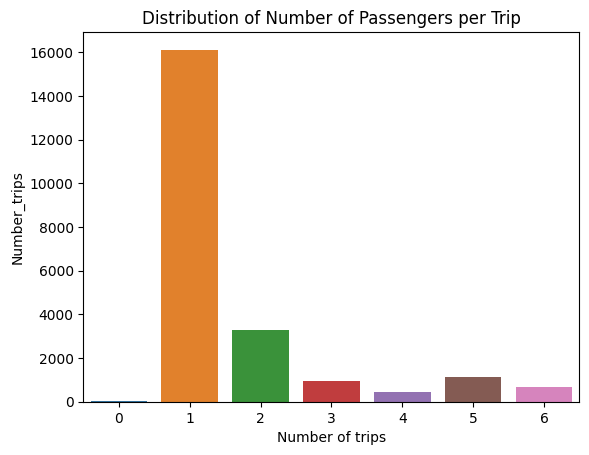

In [16]:
passenger_count_DF = dataset['passenger_count'].value_counts().reset_index()
passenger_count_DF.columns = ['Passengers', 'Number_trips']
sns.barplot(x = passenger_count_DF.Passengers, y = passenger_count_DF.Number_trips )
plt.xlabel('Number of passenger in each trip')
plt.xlabel('Number of trips')
plt.title('Distribution of Number of Passengers per Trip')

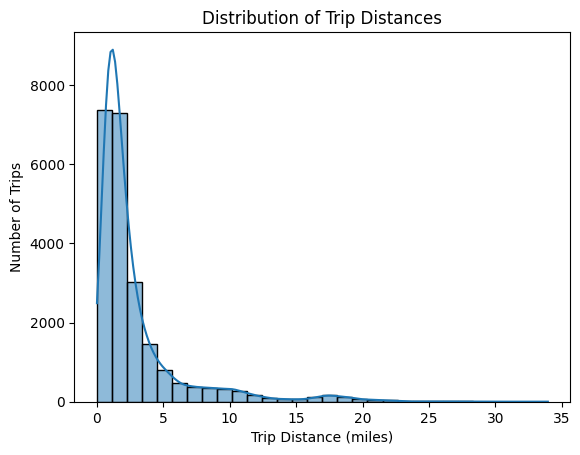

In [17]:
trip_distance_distribution = dataset['trip_distance'].value_counts().reset_index()
trip_distance_distribution.columns = ['trip_distance', 'trip_count']

sns.histplot(dataset['trip_distance'], bins=30, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Trips')
plt.show()

## Section 4: Location Analysis 

This section addresses the following questions: 

1. Which pickup and dropoff locations are the most common?  
  
  
2. How does the distribution of trips vary across different TLC Taxi Zones? 

In [18]:
# Most common pickup locations
common_pickup_locations = dataset['PULocationID'].value_counts().reset_index()
common_pickup_locations.columns = ['LocationID', 'Number_of_trips']
print("Top 10 Most Common Pickup Locations:")
print(common_pickup_locations.head(10))

Top 10 Most Common Pickup Locations:
   LocationID  Number_of_trips
0         237              890
1         161              861
2         186              792
3         236              785
4         162              779
5         170              749
6         234              749
7          48              741
8         230              739
9         142              649


In [19]:
# Most common drop locations
common_drop_locations = dataset['DOLocationID'].value_counts().reset_index()
common_drop_locations.columns = ['LocationID', 'Number_of_trips']
print("Top 10 Most Common Drop Locations:")
print(common_drop_locations.head(10))

Top 10 Most Common Drop Locations:
   LocationID  Number_of_trips
0         161              858
1         236              802
2         230              761
3         237              759
4         170              699
5         162              681
6         234              661
7         186              653
8          48              619
9         142              612


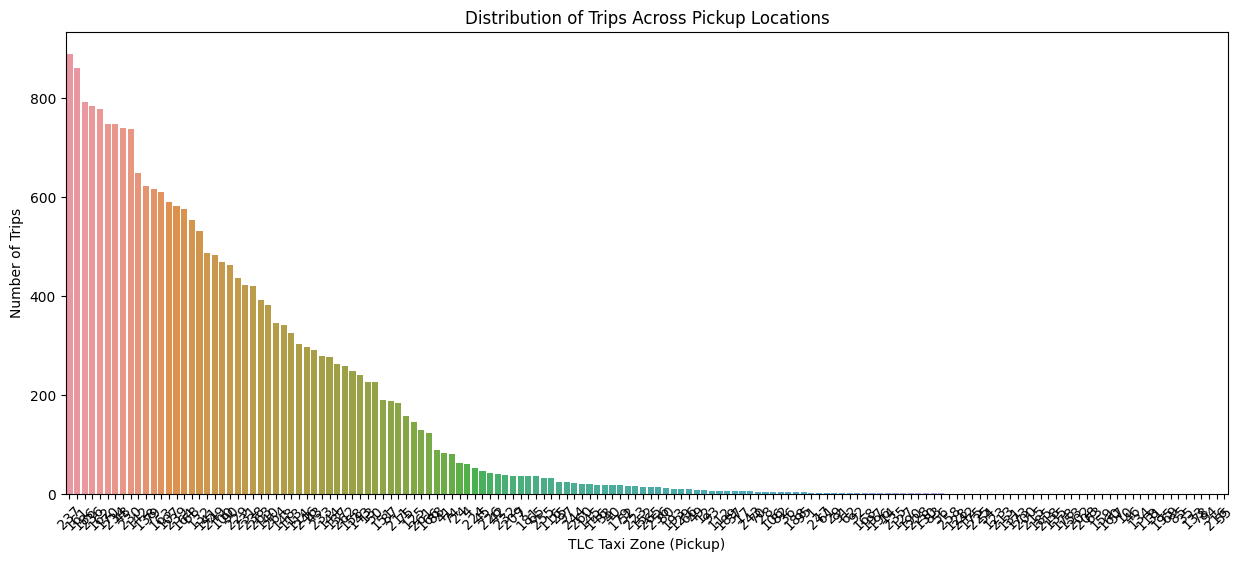

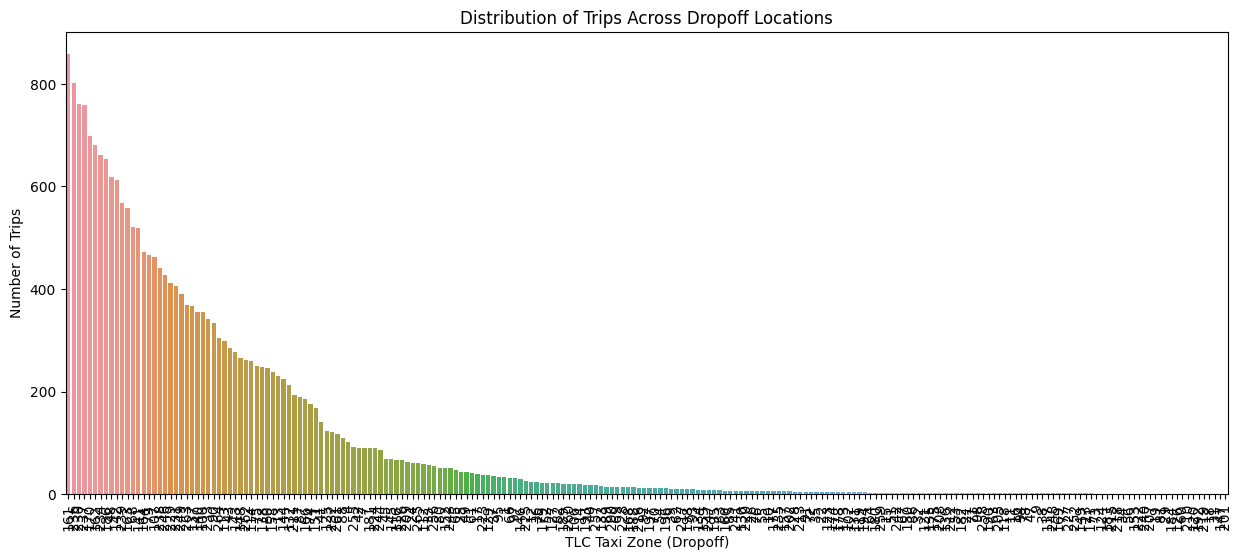

In [20]:
# Distribution of trips across pickup locations
plt.figure(figsize=(15, 6))
sns.countplot(x='PULocationID', data=dataset, order=dataset['PULocationID'].value_counts().index)
plt.title('Distribution of Trips Across Pickup Locations')
plt.xlabel('TLC Taxi Zone (Pickup)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Distribution of trips across dropoff locations
plt.figure(figsize=(15, 6))
sns.countplot(x='DOLocationID', data=dataset, order=dataset['DOLocationID'].value_counts().index)
plt.title('Distribution of Trips Across Dropoff Locations')
plt.xlabel('TLC Taxi Zone (Dropoff)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

## Section 5: Rate Code Analysis

This section addresses the following questions: 

1. What is the distribution of different rate codes?
  
  
2. How does the tip amount vary for different rate codes?

In [21]:
rate_codes = dataset['RatecodeID'].value_counts().reset_index()
rate_codes.columns = ['Rate_code', 'Number']

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '99')])

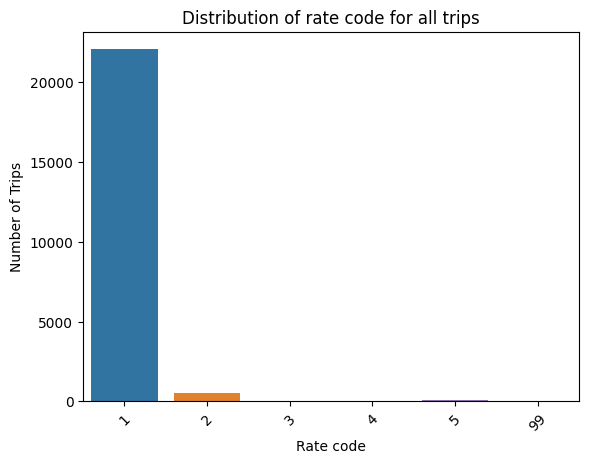

In [22]:
sns.barplot(x = rate_codes.Rate_code, y = rate_codes.Number )
plt.title('Distribution of rate code for all trips')
plt.xlabel('Rate code')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

## Section 6: Payment Analysis

This section addresses the following questions: 

1. What are the most common payment types?
  
  
2. Is there a correlation between payment types and fare amounts?

Text(0.5, 1.0, 'Mode of payment vs transaction')

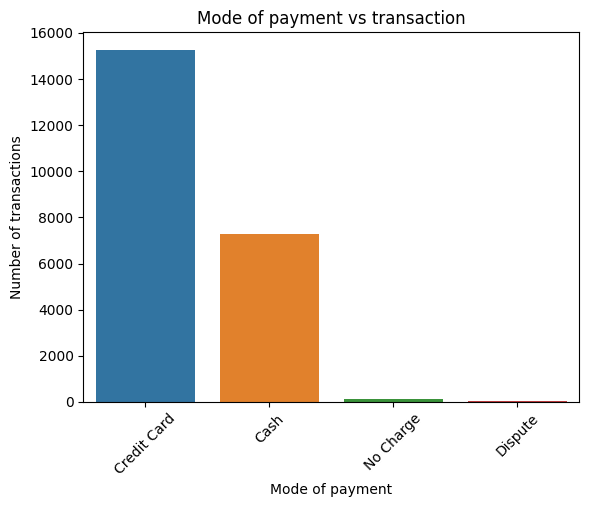

In [26]:
# Calculate the count of each payment type

common_payment_types = dataset['payment_type'].value_counts().reset_index()
common_payment_types.columns = ['Payment', 'Total Number']

# Convert numerical data to categorical label 

payment_mapping = {1:'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}

#Replace 

common_payment_types['Payment'] = common_payment_types['Payment'].replace(payment_mapping)

#Visualize 

sns.barplot(x = common_payment_types['Payment'], y = common_payment_types['Total Number'], data = common_payment_types)
plt.xlabel('Mode of payment')
plt.xticks(rotation = 45)
plt.ylabel('Number of transactions')
plt.title('Mode of payment vs transaction')

In [27]:
# Is there a correlation between payment types and fare amounts?

correlation = dataset['payment_type'].corr(dataset['fare_amount'])
print(f"The correlation between mode of payment and fare amount is {correlation}")

The correlation between mode of payment and fare amount is -0.04385588984379361


Text(0, 0.5, 'Total Amount')

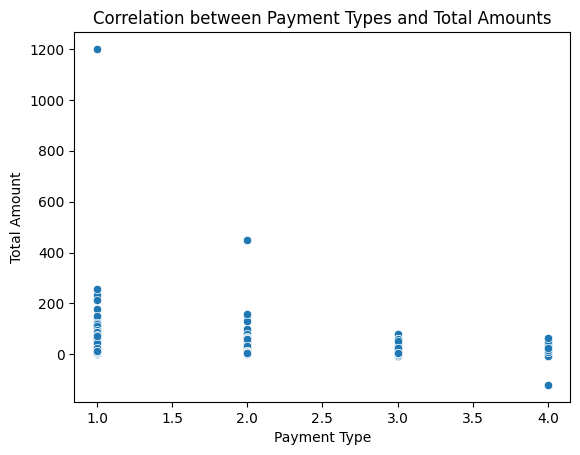

In [28]:
sns.scatterplot(x='payment_type', y='total_amount', data=dataset)
plt.title('Correlation between Payment Types and Total Amounts')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')

## Section 7: Improvement Surcharge Analysis

This section addresses the following questions: 

1. How has the improvement surcharge changed over time?
  
  
2. Is there a noticeable impact on total amounts due to the improvement surcharge?

In [29]:
#Extract month from datetime column 

dataset['pickup_month'] = pd.to_datetime(dataset['tpep_pickup_datetime']).dt.month_name()

In [30]:
surcharge_over_month = dataset.groupby('pickup_month').agg({'improvement_surcharge': 'mean','total_amount': 'mean'}).reset_index()


In [31]:
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Create a new column 'month_numeric' based on the month_order dictionary
surcharge_over_month['month_numeric'] = surcharge_over_month['pickup_month'].map(month_order)

# Sort the DataFrame by 'month_numeric'
surcharge_over_month_sorted = surcharge_over_month.sort_values(by='month_numeric').drop('month_numeric', axis=1)

surcharge_over_month_sorted




,pickup_month,improvement_surcharge,total_amount
4,January,0.299700,15.891462
3,February,0.299661,16.358332
7,March,0.299414,16.147335
0,April,0.299406,15.855641
8,May,0.299702,16.805057
6,June,0.299542,16.761976
5,July,0.299293,15.685115
1,August,0.299826,16.101833
11,September,0.299654,16.266655
10,October,0.299556,16.312694


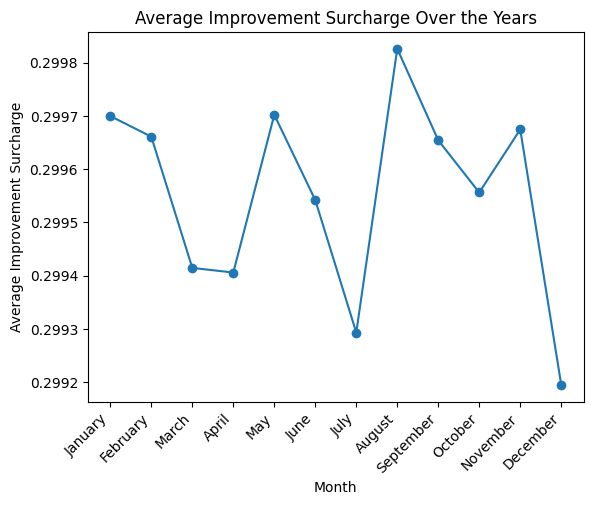

In [32]:
# Plot the trend
plt.plot(surcharge_over_month_sorted.pickup_month, surcharge_over_month_sorted.improvement_surcharge, 'o-')
plt.title('Average Improvement Surcharge Over the Years')
plt.xlabel('Month')
plt.ylabel('Average Improvement Surcharge')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

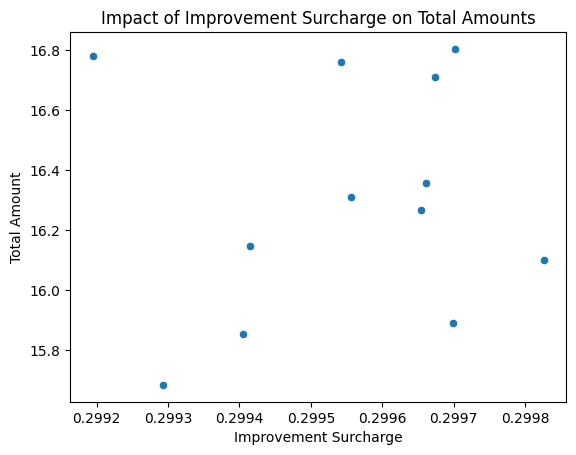

In [33]:
# Is there a noticeable impact on total amounts due to the improvement surcharge?

sns.scatterplot(x='improvement_surcharge', y='total_amount', data=surcharge_over_month_sorted)
plt.title('Impact of Improvement Surcharge on Total Amounts')
plt.xlabel('Improvement Surcharge')
plt.ylabel('Total Amount')
plt.show()

## Section 8: Correlation Analysis

This section addresses the following questions: 

1. Are there any correlations between variables such as trip distance and fare amount?
  
  
2. What factors contribute the most to the total amount charged to passengers?

In [34]:
# Are there any correlations between variables such as trip distance and fare amount?

Correlation_trip_dist_fare_amount = dataset['trip_distance'].corr(dataset['fare_amount'])
print(f"The correlation between mode of payment and fare amount is {Correlation_trip_dist_fare_amount}")

The correlation between mode of payment and fare amount is 0.7565989842423747


Text(0, 0.5, 'Fare amount')

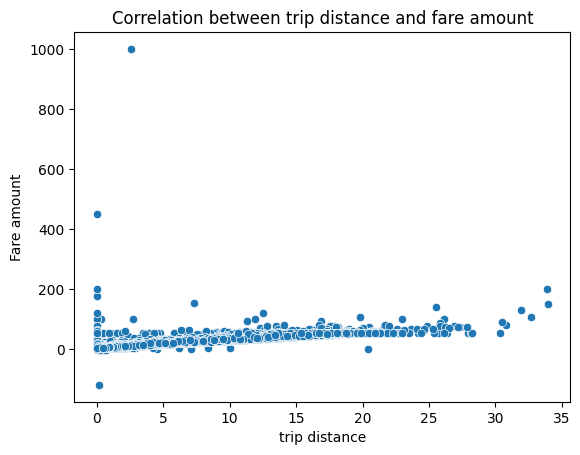

In [35]:
# Plot its scatterness 

sns.scatterplot(x='trip_distance', y='fare_amount', data=dataset)
plt.title('Correlation between trip distance and fare amount')
plt.xlabel('trip distance')
plt.ylabel('Fare amount')